#### Week 5 Assignment
##### Michael Perrine
##### DSC 550
##### Professor Werner

# Bag of Words Meets Bag of Popcorn 

The goal of this analysis is to discover the sentiment of movie reviews. To accomplish this task I will begin by importing various libraries and the data set. The first step is to load and stem the data. Afterwards I will run a Logistic regression and a Random forest analysis.

In [91]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
import sys
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mchlp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# This code uploads the dataset and views the first  rows to ensure the data is loaded properly
movie = pd.read_csv(r"C:\Users\mchlp\OneDrive\Documents\Data Mining\data-mining\labeledTrainData.tsv (1)\labeledTrainData.tsv", sep="\t" )
movie.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [ ]:
# This code creates a subset of the movie reviews 
review = movie["review"]
review.head()

0    With all this stuff going down at the moment w...
1    \The Classic War of the Worlds\" by Timothy Hi...
2    The film starts with a manager (Nicholas Bell)...
3    It must be assumed that those who praised this...
4    Superbly trashy and wondrously unpretentious 8...
Name: review, dtype: object

In [ ]:
# This code converts all text to lower case letters
lower = review

def lower_case(string:str) -> str:
    return string.lower()


[lower_case(string) for string in lower]



In [ ]:
# This code removes all punctuation marks in the text
punctuation = dict.fromkeys((i for i in range(sys.maxunicode)\
    if  unicodedata.category(chr(i)).startswith("P")), None)

In [ ]:
# This code applies the puncuation code to the data
lower_1 = [string.translate(punctuation) for string in lower]
lower_1

In [ ]:
# This code creates the stop words dictionary
stop_words = stopwords.words("english")

In [ ]:
# This code applies the stop words dictionary
[word for word in lower_1 if word not in stop_words]

In [ ]:
# This code creates the porte stemmer function
porter = PorterStemmer()

In [ ]:
# This code applies the function
lower_2 = [porter.stem(word) for word in lower_1]
lower_2

In [ ]:
# This code splits the data
train, test = train_test_split(lower_2, test_size= 0.2)

In [ ]:
# This code creates the Tfidf vector
v = TfidfVectorizer()
transformed_output= v.fit_transform(train)
v.vocabulary_

In [ ]:
# This code creates feature names for the Tfidf vector
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    index = v.vocabulary_.get(word)
    print(f"{word} {v.idf_[index]}")

In [114]:
X_train, X_test, y_train, y_test = train_test_split(movie.review, movie.sentiment,
                                                    test_size=0.20, random_state=0, stratify= movie.sentiment)

In [115]:
print("The shape of the training set is", X_train.shape)
print("The shape of the testing set is", X_test.shape)

The shape of the training set is (20000,)
The shape of the testing set is (5000,)


In [ ]:
# This code displays the value counts for the y_train
y_train.value_counts()

sentiment
1    10000
0    10000
Name: count, dtype: int64

In [ ]:
# This code displays the value counts for the y_test
y_test.value_counts()

sentiment
1    2500
0    2500
Name: count, dtype: int64

Logistic regression

In [ ]:
#This code creates the x and y variables for the logistic regression
x = movie.iloc[:, 0:1]
Y = movie.iloc[:, 1]

In [ ]:
# This code splits the data into a training and testing set
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.20, random_state= 45)

In [ ]:
# This code displays the shape of the x training data
x_train.shape

(20000, 1)

In [ ]:
# This code displays the shape of the x testing data
x_test.shape

(5000, 1)

In [ ]:
# This code builds the logistic regression function
movie_model = LogisticRegression()

In [ ]:
# This code fits the data to the model
movie_model.fit(x_train, Y_train)

LogisticRegression()

In [ ]:
# This code predicts the model
Y_pred = movie_model.predict(x_test)

In [ ]:
# This code produces the model score
movie_model.score(x_test, Y_test)

0.6376

In [ ]:
# This code produces the confusion matrix
print(confusion_matrix(Y_test, Y_pred))

[[2082  429]
 [1383 1106]]


In [ ]:
# This code creates the classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.83      0.70      2511
           1       0.72      0.44      0.55      2489

    accuracy                           0.64      5000
   macro avg       0.66      0.64      0.62      5000
weighted avg       0.66      0.64      0.62      5000



In [ ]:
# this code creates the predict proba for the model
Y_score = movie_model.predict_proba(x_test)

In [83]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_score[:,1])

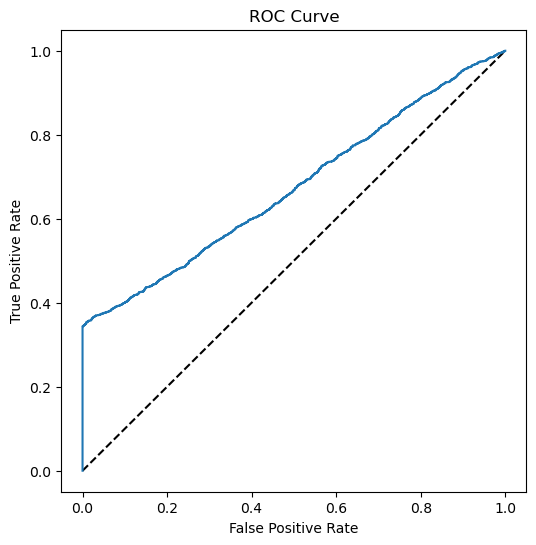

In [85]:
# Plot the ROC Curve
fig = plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Random forest

In [ ]:
# This code creates the random forest classifier model and fits the data to the model
rf = RandomForestClassifier(max_features=5, n_estimators=1000)
rf.fit(x_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=1000)

In [ ]:
# This code creates the prediction value for the random forest classifier
Y_pred_1 = rf.predict(x_test)

In [ ]:
# This code creates a score for the random forest classifier
rf.score(x_test, Y_test)

0.3248

In [ ]:
# This code creates a classification report
print(classification_report(Y_test, Y_pred_1))

              precision    recall  f1-score   support

           0       0.29      0.25      0.27      2511
           1       0.35      0.40      0.37      2489

    accuracy                           0.32      5000
   macro avg       0.32      0.33      0.32      5000
weighted avg       0.32      0.32      0.32      5000



In [ ]:
# This code creates the Y score for the random forest classifier
Y_score = rf.predict_proba(x_test)

In [ ]:
# This code creates the fpr tpr, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_score[:,1])

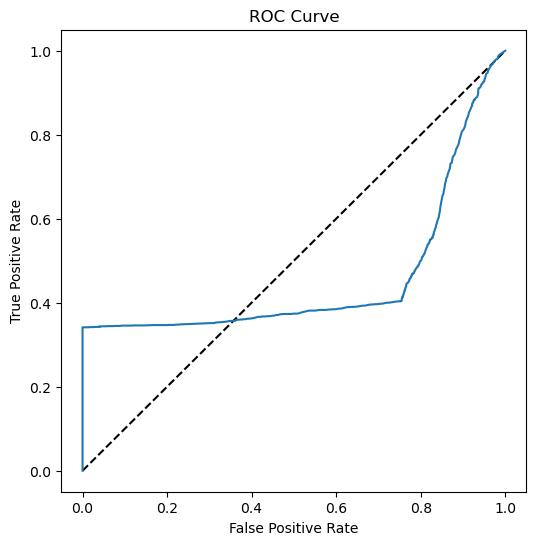

In [ ]:
# This code creates the ROC Curve
fig = plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
# This code creates the random forest classifier and creates hyperparamaters for the model
rf_2 = RandomForestClassifier(n_estimators= 1000, 
                            criterion= "entropy",
                            min_samples_split= 10,
                            max_depth= 14,
                            random_state= 15)

In [ ]:
# This code fits the data to the model
rf_2.fit(x_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=15)

In [ ]:
# This code creates a score for the random forest classifier
rf_2.score(x_test,Y_test)

0.6674

In [ ]:
# This code creates the prediction value for the random forest classifier
Y_pred_2= rf_2.predict(x_test)

In [ ]:
# This code creates a classification report
print(classification_report(Y_test, Y_pred_2))

              precision    recall  f1-score   support

           0       0.60      0.99      0.75      2511
           1       0.97      0.34      0.51      2489

    accuracy                           0.67      5000
   macro avg       0.79      0.67      0.63      5000
weighted avg       0.78      0.67      0.63      5000



In [ ]:
# This code creates the Y score 2 for the random forest classifier
Y_score_2 = rf_2.predict_proba(x_test)

In [ ]:
# This code creates the fpr tpr, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_score_2[:,1])

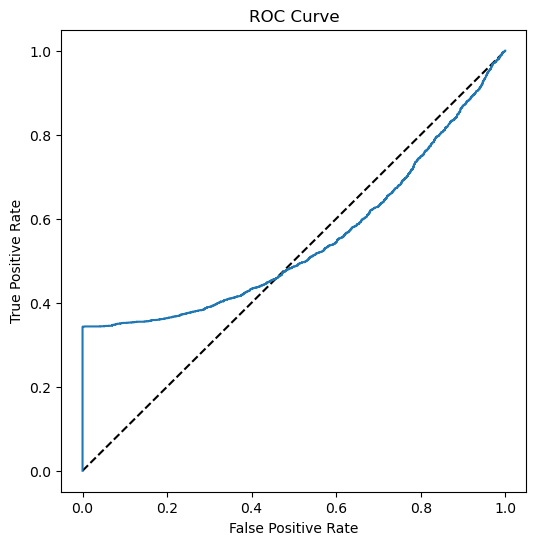

In [ ]:
# This code creates the ROC Curve
fig = plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()